1] Import all the required libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

2] Read Dataset

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Everlytics-Project/Phishing-Data.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dispaly Dataset

In [ ]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,0,1,1,-1,1,-1,1,1,0,0,0,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,0,1,1,0,-1,-1,0,0,0,0,0,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,0,1,1,0,-1,-1,1,1,0,0,0,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,0,1,-1,0,0,-1,0,0,0,0,0,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,0,0,1,0,0,-1,0,0,0,1,0,1,0,-1,1,0,-1,0,1,0,0


In [ ]:
df.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
2451,0,-1,0,0,0,0,0,-1,1,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,0,1,0,0,0,0,1,0,0,0,-1,-1,0,-1,0,0,0,0,0,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,1,-1,0,0,0,0,0,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,0,0,1,-1,-1,-1,0,0,0,0,0,0,0,1,0,-1,-1,0,0,0,1
2455,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,0,-1,0,0,0,0,0,0,0,-1,0,1,1,0,0,0,0


3] Check for Dtypes and Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [ ]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,0.135179,0.160423,0.195440,-0.074104,-0.084691,-0.677524,0.184853,0.140879,0.105863,0.118078,0.042345,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,0.341984,0.367073,0.980915,0.710845,0.750393,0.735650,0.388258,0.347968,0.307725,0.322766,0.201417,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

4] Unique values in each column

In [ ]:
columns = df.columns
for _ in columns:
  i = df[_].unique()
  print(_,i)

having_IP_Address [1 0]
URL_Length [ 1  0 -1]
Shortining_Service [0 1]
having_At_Symbol [0 1]
double_slash_redirecting [1 0]
Prefix_Suffix [-1  0  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [ 0  1 -1]
Favicon [0 1]
port [0 1]
HTTPS_token [1 0]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1]
Submitting_to_email [1 0]
Abnormal_URL [1 0]
Redirect [0 1]
on_mouseover [0 1]
RightClick [0 1]
popUpWidnow [0 1]
Iframe [0 1]
age_of_domain [-1  0  1]
DNSRecord [1 0]
web_traffic [-1  0  1]
Page_Rank [-1  0  1]
Google_Index [0 1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [1 0]
Result [1 0]


5] Data Distribution with respect to Target Variable

<Axes: xlabel='Result', ylabel='count'>

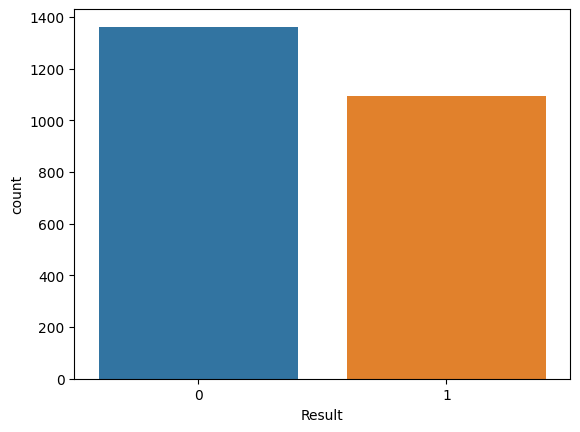

In [ ]:
sns.countplot(x=df['Result'])

6] Colinearity between features and target variable

In [ ]:
pd.set_option('display.max_columns',None)
corr_df = df.corr().round(2)
corr_df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.00,0.10,0.95,-0.09,0.92,0.11,0.02,0.04,-0.10,0.03,0.02,0.82,0.05,-0.01,0.16,0.10,0.04,0.79,0.87,0.07,0.04,0.05,0.03,0.05,0.23,0.11,-0.02,-0.05,0.24,0.22,-0.06
URL_Length,0.10,1.00,0.12,0.07,0.10,0.07,-0.01,0.04,-0.33,0.05,-0.00,0.11,0.25,-0.03,0.05,0.96,0.02,0.11,0.09,0.04,0.01,0.05,0.01,0.01,0.05,0.02,0.00,-0.03,-0.01,0.08,-0.06
Shortining_Service,0.95,0.12,1.00,-0.07,0.88,0.11,0.03,0.05,-0.09,0.01,0.00,0.80,0.04,-0.01,0.16,0.09,0.05,0.78,0.84,0.07,0.03,0.05,0.02,0.06,0.24,0.10,-0.03,-0.04,0.21,0.22,-0.06
having_At_Symbol,-0.09,0.07,-0.07,1.00,-0.09,0.03,0.00,-0.00,-0.00,-0.12,-0.09,-0.08,-0.00,-0.04,0.20,0.08,-0.11,-0.09,-0.08,-0.09,-0.05,-0.12,-0.08,0.04,-0.11,-0.07,0.04,-0.03,-0.09,-0.10,0.01
double_slash_redirecting,0.92,0.10,0.88,-0.09,1.00,0.11,0.02,0.03,-0.09,0.05,0.03,0.79,0.04,0.00,0.15,0.10,0.04,0.77,0.91,0.10,0.03,0.07,0.02,0.04,0.23,0.11,-0.02,-0.05,0.20,0.21,-0.04
Prefix_Suffix,0.11,0.07,0.11,0.03,0.11,1.00,0.12,0.37,-0.14,-0.02,-0.01,0.07,0.07,0.39,0.13,0.09,0.02,0.09,0.10,-0.04,0.00,-0.01,0.01,0.18,-0.07,0.24,0.22,-0.16,0.07,0.01,-0.54
having_Sub_Domain,0.02,-0.01,0.03,0.00,0.02,0.12,1.00,0.26,-0.05,-0.02,-0.04,0.02,0.06,0.18,0.11,-0.00,-0.04,0.01,0.01,0.02,-0.04,0.01,-0.03,0.34,-0.06,0.08,0.10,-0.05,-0.02,-0.02,-0.27
SSLfinal_State,0.04,0.04,0.05,-0.00,0.03,0.37,0.26,1.00,-0.22,0.01,-0.04,0.03,0.19,0.56,0.14,0.05,-0.01,0.04,0.04,-0.03,-0.02,0.00,-0.00,0.37,-0.14,0.41,0.28,-0.14,-0.01,-0.02,-0.71
Domain_registeration_length,-0.10,-0.33,-0.09,-0.00,-0.09,-0.14,-0.05,-0.22,1.00,-0.07,-0.03,-0.09,-0.68,-0.18,-0.12,-0.35,-0.04,-0.08,-0.10,-0.03,-0.05,-0.07,-0.02,-0.13,0.03,-0.20,-0.04,0.07,0.11,-0.03,0.26
Favicon,0.03,0.05,0.01,-0.12,0.05,-0.02,-0.02,0.01,-0.07,1.00,0.81,0.04,0.01,-0.04,0.12,0.06,0.70,0.08,0.04,0.72,0.42,0.94,0.64,0.01,0.16,0.08,-0.03,-0.02,0.13,0.66,0.01


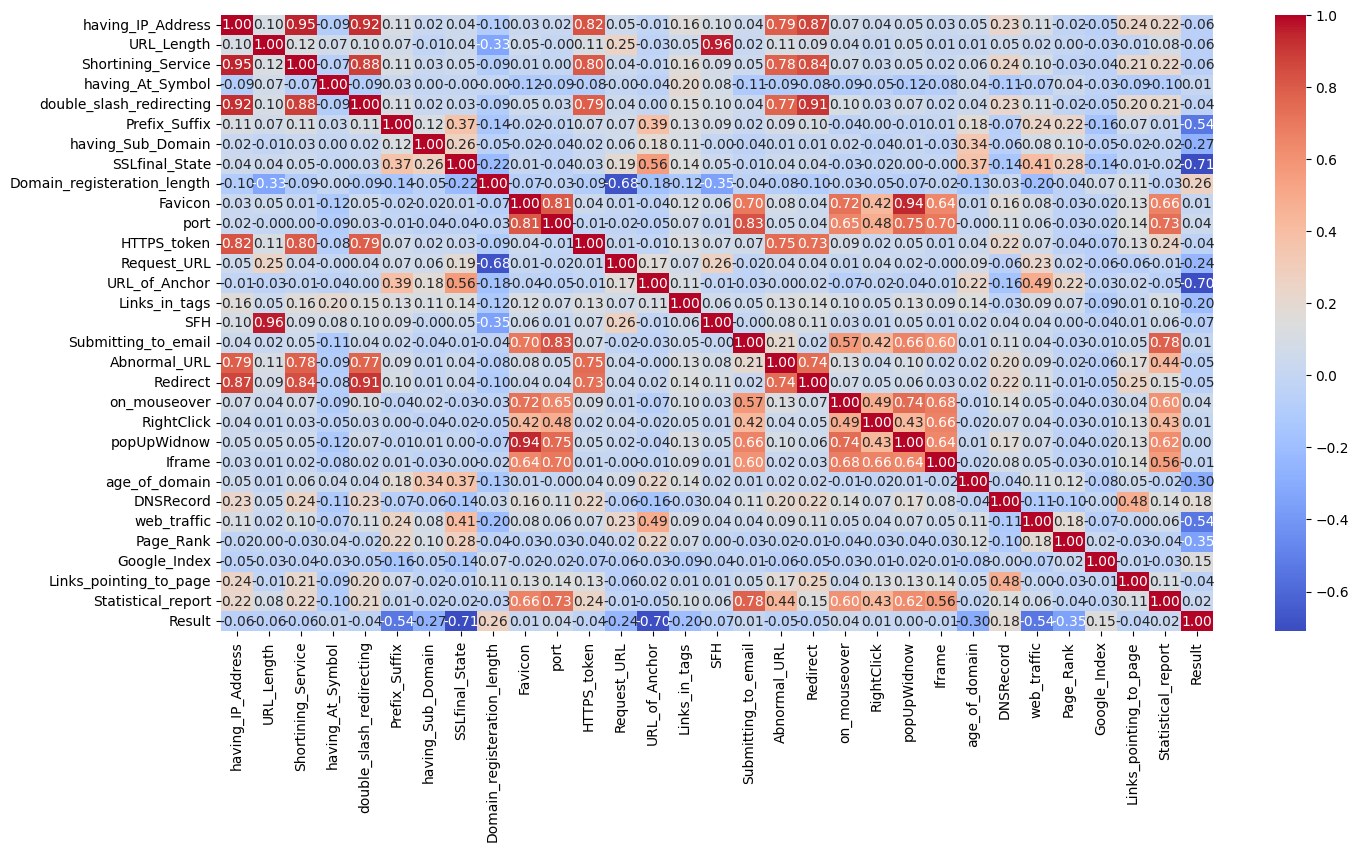

In [ ]:
#plot heatmap for better understanding
plt.figure(figsize=(16,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

7] Drop Column with zero colinearity with Target

In [ ]:
df.drop(columns=['popUpWidnow'], inplace=True)

8] Box Plot for checking Outliers

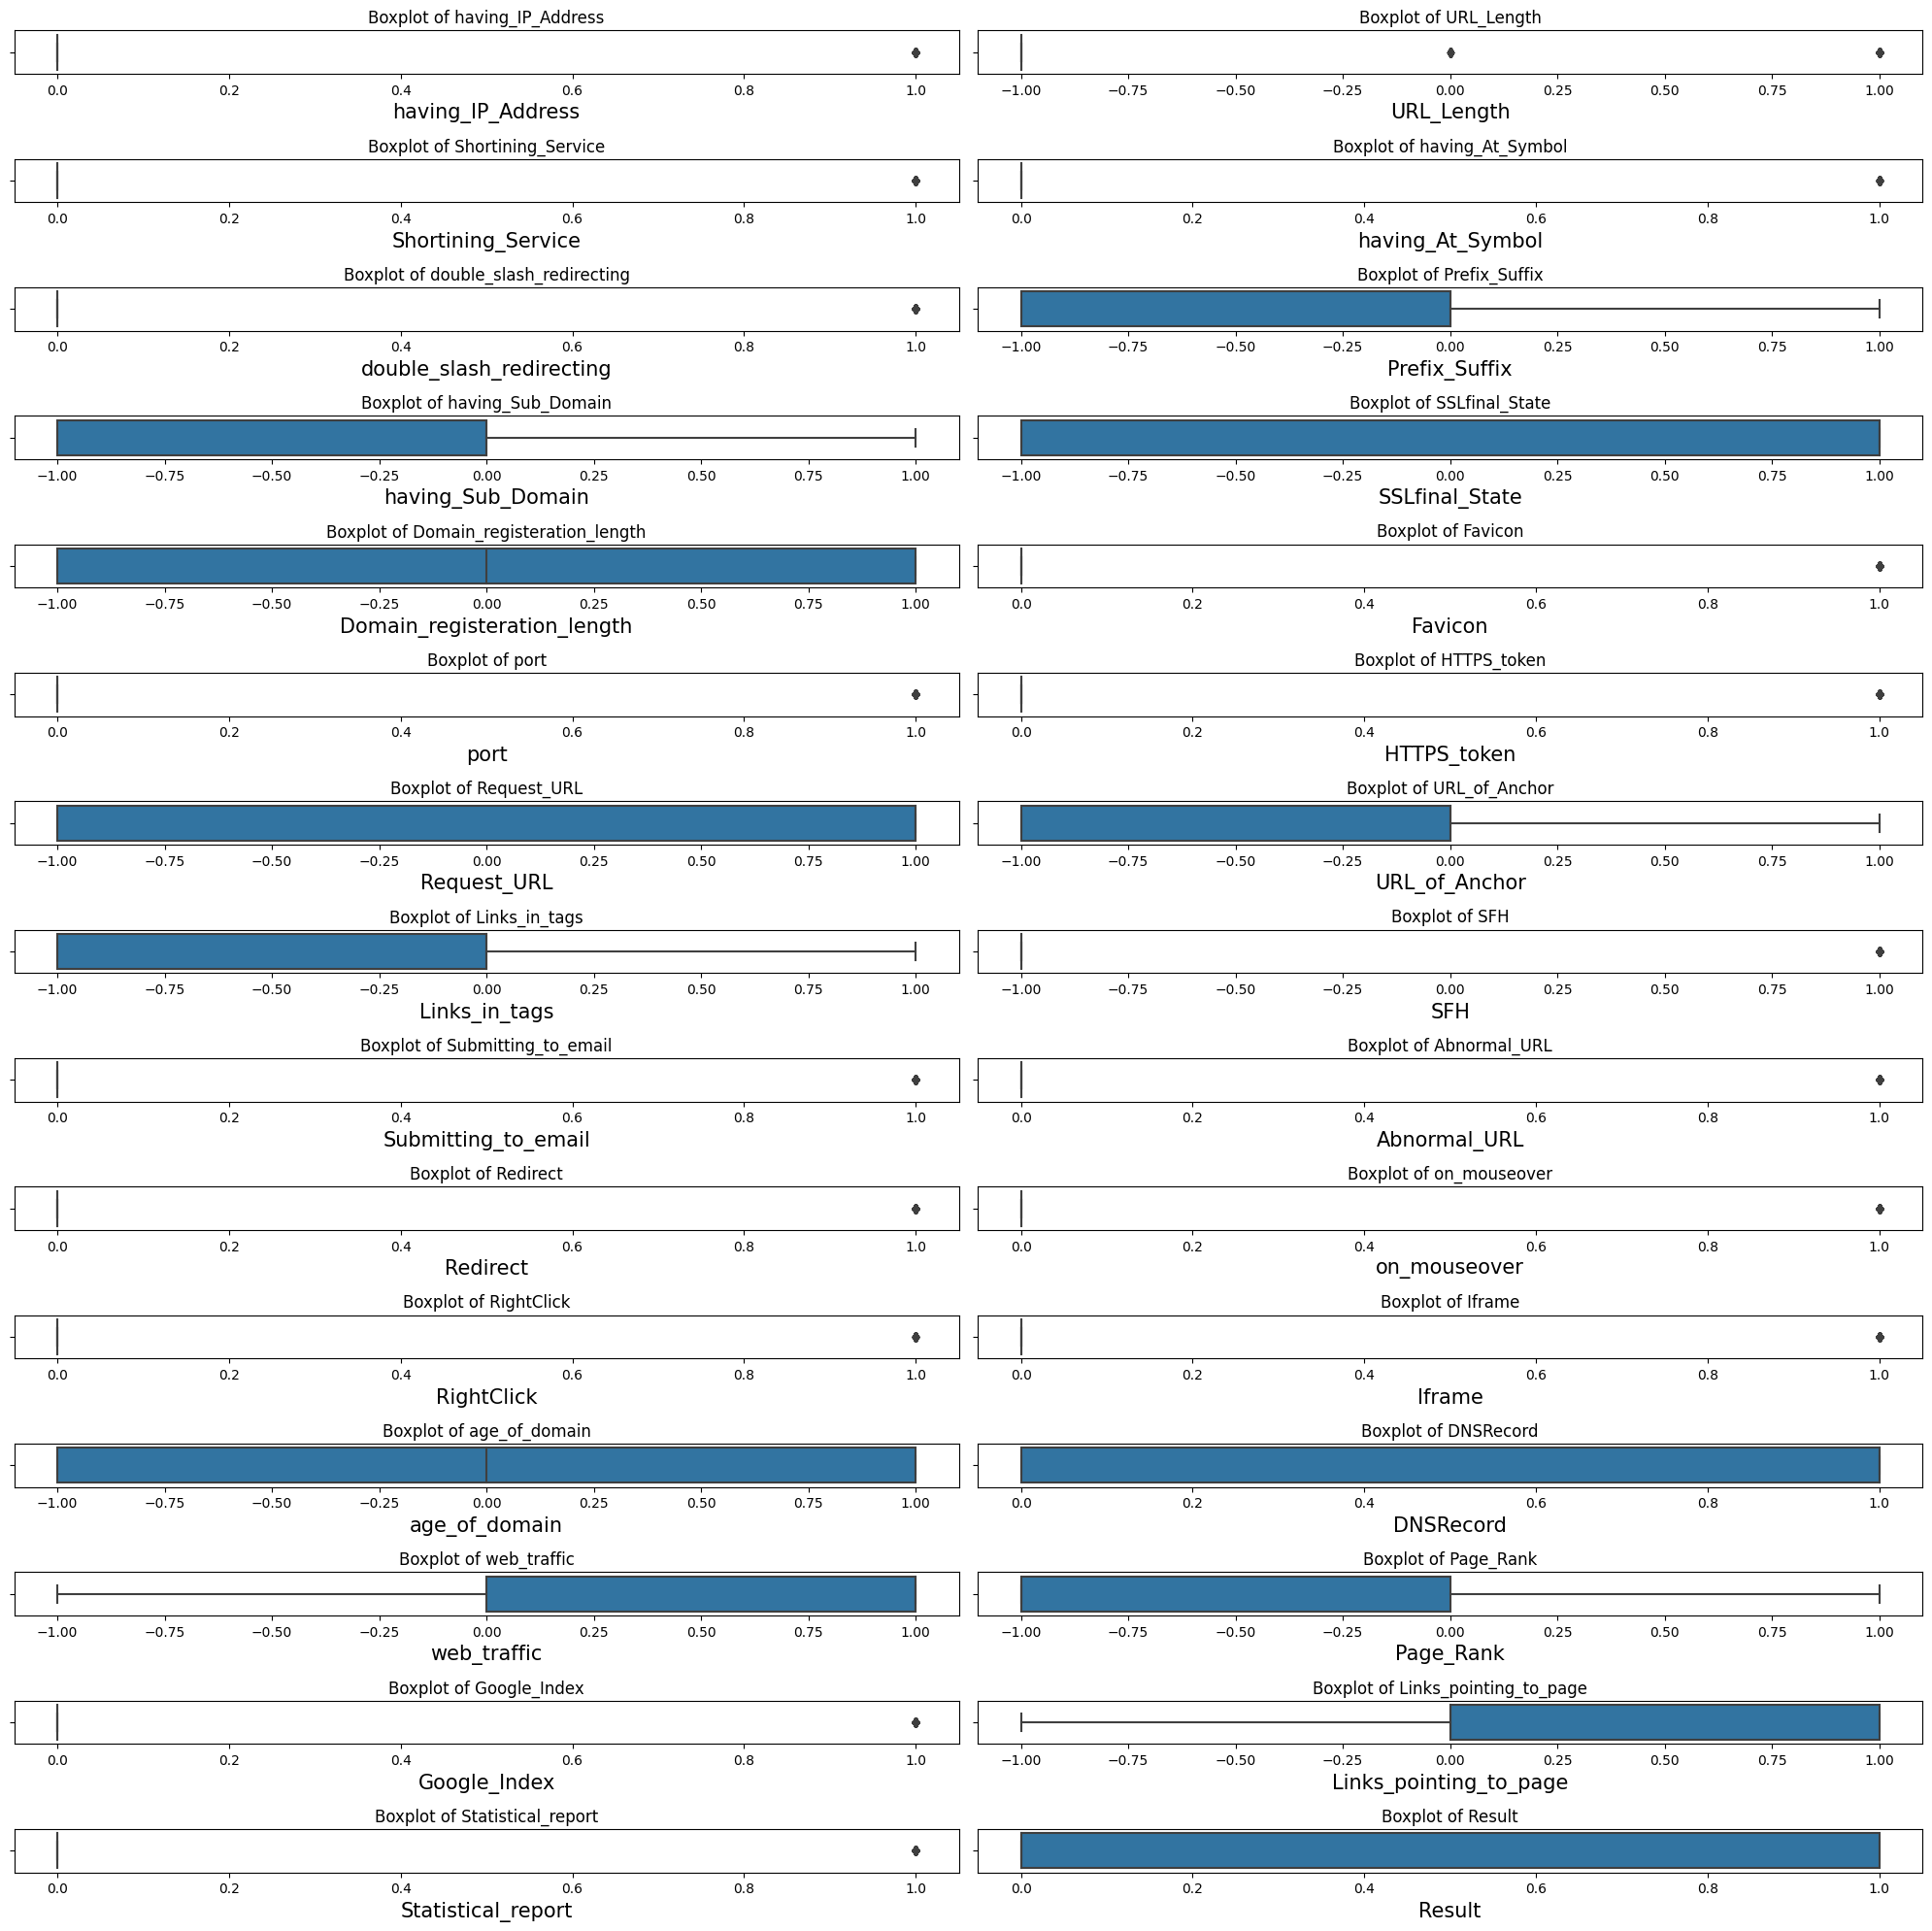

In [ ]:
#Plotting BoxPlot
col = []
for cols in df:
    col.append(cols)

#plotting boxplot
plt.figure(figsize=(20,20))
for i,v in enumerate(col):
    plt.subplot(15,2,i+1)
    sns.boxplot(x=v,data=df)
    plt.title("Boxplot of {}".format(v))
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

9] Split data into train and test data

In [ ]:
x = df.drop(['Result'],axis =1)
y = pd.DataFrame(df['Result'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 1)

In [ ]:
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,0,1,1,-1,1,-1,1,1,0,0,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,0,1,1,0,-1,-1,0,0,0,0,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,0,1,1,0,-1,-1,1,1,0,0,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,0,1,-1,0,0,-1,0,0,0,0,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,0,0,1,0,0,-1,0,0,0,1,0,0,-1,1,0,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,0,0,-1,1,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,0,1,0,0,0,0,1,0,0,0,-1,-1,0,-1,0,0,0,0,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,0,0,1,0,0,0,0,1,0,1,-1,0,0,0,0,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,0,0,1,-1,-1,-1,0,0,0,0,0,0,1,0,-1,-1,0,0,0,1


In [ ]:
print('X train : ',x_train.shape)
print('X Test : ',x_test.shape)
print('Y train : ',y_train.shape)
print('Y Test : ',y_test.shape)

X train :  (1964, 29)
X Test :  (492, 29)
Y train :  (1964, 1)
Y Test :  (492, 1)


<Axes: xlabel='Result', ylabel='count'>

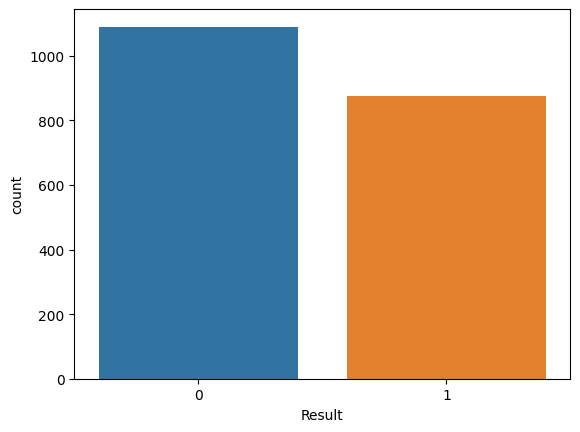

In [ ]:
sns.countplot(x=y_train['Result'])

In [ ]:
y_train = y_train['Result'].values.ravel()
y_test = y_test['Result'].values.ravel()

10] Load Model

In [ ]:
rf = RandomForestClassifier(random_state=1)
#random forest as it is a tree structure and we can avoid multi colinearity between our features.

11] Hyper Parameter Tuning

In [ ]:
#Using GreadSearchCV
np.random.seed(1)
start = time.time()

param_dist = {'max_depth': [12,14,16,18,20,22],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2',None],
              'criterion': ['gini', 'entropy'],
              }

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2'}
Time taken in grid search:  144.31


In [ ]:
# Set best parameters given by grid search
rf.set_params(random_state = 1,
              bootstrap= True,
              criterion = 'gini',
              max_features = 'log2',
              max_depth = 20)

RandomForestClassifier(max_depth=20, max_features='log2', random_state=1)

12] Train Model

In [ ]:
model_rf = rf.fit(x_train, y_train)

13] Predictions by model on test data

In [ ]:
predictions_rf = model_rf.predict(x_test)
print(predictions_rf)

[0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0
 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 0 1 1]


14] Check Accuracy

In [ ]:
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, predictions_rf))

Accuracy: 0.967479674796748


15] Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, predictions_rf)
cm

array([[264,   8],
       [  8, 212]])

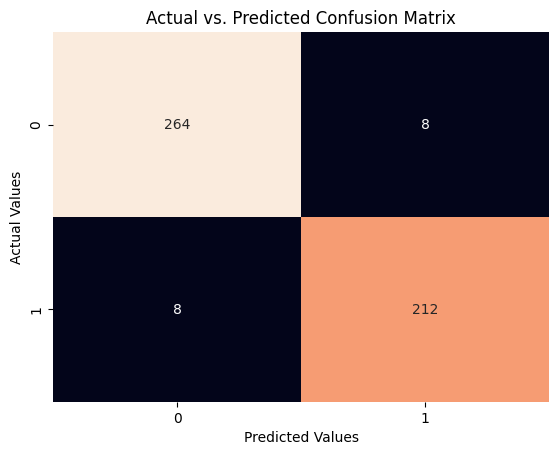

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

Classification Report of Model Performance

In [ ]:
cr = classification_report(y_test, predictions_rf)
cr

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97       272\n           1       0.96      0.96      0.96       220\n\n    accuracy                           0.97       492\n   macro avg       0.97      0.97      0.97       492\nweighted avg       0.97      0.97      0.97       492\n'